<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Project 3: NLP Analysis of Reddit Data 
## Part 4: Model Fitting

Katrin Ayrapetov 

In [73]:
import pandas as pd
from pmaw import PushshiftAPI
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import numpy as np
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import re
from sklearn.pipeline import Pipeline

In [2]:
df_clean_elem_ms =  pd.read_csv('df_clean_elem_ms.csv')
df_clean_elem_hs =  pd.read_csv('df_clean_elem_hs.csv')

In [3]:
df_clean.shape

(2838, 4)

In [3]:
#Reshuffle the dataframe and reset the index. 
df_clean_elem_ms = df_clean_elem_ms.sample(frac = 1)
df_clean_elem_hs = df_clean_elem_hs.sample(frac = 1)

In [4]:
df_clean_elem_ms.subreddit.value_counts()

ElementaryTeachers      2435
MiddleSchoolTeacher      735
Middleschoolteachers     559
Name: subreddit, dtype: int64

In [5]:
df_clean_elem_hs.subreddit.value_counts()

highschoolteachers    3084
ElementaryTeachers    2435
Name: subreddit, dtype: int64

In [6]:
#Reset the index 
df_clean_elem_ms.reset_index(drop="True",inplace=True)
df_clean_elem_hs.reset_index(drop="True",inplace=True)

In [8]:
# Binarize the target feature
df_clean_elem_ms['subreddit'] = df_clean_elem_ms['subreddit'].map(lambda x: 1 if x == 'ElementaryTeachers' else 0)
# 1 : Elementary Teachers 
# 0 : Middle School Teacher


In [10]:
# Binarize the target feature
df_clean_elem_hs['subreddit'] = df_clean_elem_hs['subreddit'].map(lambda x: 1 if x == 'ElementaryTeachers' else 0)
# 1 : Elementary Teachers 
# 0 : High School

In [12]:
#Drop the null values. 
df_clean_elem_ms.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)
df_clean_elem_hs.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)
#Reset the index 
df_clean_elem_ms.reset_index(drop="True",inplace=True)
df_clean_elem_hs.reset_index(drop="True",inplace=True)

In [14]:
df_clean_elem_hs.isnull().sum()

subreddit                0
body                     0
CLEAN_COMMENT            0
ADJ_ADV_CLEAN_COMMENT    0
dtype: int64

In [16]:
#Create dataframe X that has the clean comments  and y that has the subreddit 
X_elem_ms = df_clean_elem_ms['CLEAN_COMMENT']
y_elem_ms = df_clean_elem_ms['subreddit']



In [20]:
#Create dataframe X that has the clean comments  and y that has the subreddit 
X_elem_hs = df_clean_elem_hs['CLEAN_COMMENT']
y_elem_hs = df_clean_elem_hs['subreddit']



In [57]:
#Create dataframe X that has the clean comments  and y that has the subreddit 
YY_elem_ms=df_clean_elem_ms["ADJ_ADV_CLEAN_COMMENT"]
yy_elem_ms = df_clean_elem_ms['subreddit']
YY_elem_hs=df_clean_elem_hs["ADJ_ADV_CLEAN_COMMENT"]
yy_elem_hs = df_clean_elem_hs['subreddit']

In [18]:
# Split the data into the training and testing sets.
X_train_elem_ms, X_test_elem_ms, y_train_elem_ms, y_test_elem_ms = train_test_split(X_elem_ms,
                                                    y_elem_ms,
                                                    test_size=0.33,
                                                    stratify=y_elem_ms,
                                                    random_state=42)

In [21]:
# Split the data into the training and testing sets.
X_train_elem_hs, X_test_elem_hs, y_train_elem_hs, y_test_elem_hs = train_test_split(X_elem_hs,
                                                    y_elem_hs,
                                                    test_size=0.33,
                                                    stratify=y_elem_hs,
                                                    random_state=42)

In [12]:
# Split the data into the training and testing sets.
YY_train_elem_ms, YY_test_elem_ms, yy_train_elem_ms, yy_test_elem_ms = train_test_split(YY_elem_ms,
                                                    yy_elem_ms,
                                                    test_size=0.33,
                                                    stratify=yy_elem_ms,
                                                    random_state=42)

In [58]:
# Split the data into the training and testing sets.
YY_train_elem_hs, YY_test_elem_hs, yy_train_elem_hs, yy_test_elem_hs = train_test_split(YY_elem_hs,
                                                    yy_elem_hs,
                                                    test_size=0.33,
                                                    stratify=yy_elem_hs,
                                                    random_state=42)

<font style="font-size: 2rem; color: blue">
Use Multinomial Naive Bayes on Elementary School and Middle School Data
    <br> - The training set accuracy is : 0.89 <br>
    <br> - The testing set accuracy 0.73 <br>
   
</font>

In [22]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

In [25]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params = {
    'cvec__max_features': [1000,2000,3000,4000,5000,5500],
    'cvec__max_df': [0.70,0.75,0.8,0.85,.9, .95],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)]
}

In [26]:
# Instantiate GridSearchCV.

gs = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                 cv = 3) # 3-fold cross-validation.

In [110]:
gs.best_params_

{'cvec__max_df': 0.7, 'cvec__max_features': 5000, 'cvec__ngram_range': (1, 2)}

In [27]:
# Fit GridSearch to training data.

gs.fit(X_train_elem_ms, y_train_elem_ms)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
                         'cvec__max_features': [1000, 2000, 3000, 4000, 5000,
                                                5500],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [28]:
# Score model on training set and on test set.

gs.score(X_train_elem_ms,y_train_elem_ms),gs.score(X_test_elem_ms,y_test_elem_ms)

(0.890738813735692, 0.7278481012658228)

<font style="font-size: 2rem; color: blue">
Use Multinomial Naive Bayes on Elementary School and High School Data
    <br> - The training set accuracy is : 0.90 <br>
    <br> - The testing set accuracy 0.80 <br>
   
</font>

In [32]:
# Instantiate GridSearchCV.

gs2 = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                 cv = 3) # 3-fold cross-validation.

In [33]:
gs2.fit(X_train_elem_hs, y_train_elem_hs)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
                         'cvec__max_features': [1000, 2000, 3000, 4000, 5000,
                                                5500],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [34]:
gs2.score(X_train_elem_hs,y_train_elem_hs),gs.score(X_test_elem_hs,y_test_elem_hs)

(0.8960197469916692, 0.7952410770194114)

<font style="font-size: 2rem; color: blue">
Use Logistic Regression on Elementary School and Middle School Data
    <br> - The training set accuracy is : 0.96 <br>
    <br> - The testing set accuracy is: 0.71   <br>
   
</font>

In [35]:
pipeL = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])




paramsL = {  
    'cvec__max_df': [0.70,0.75,0.8,0.85,.9, .95],
    'cvec__max_features': [1000,2000,3000,4000,5000,5500],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)],
    'model__C' : np.linspace(0.0001, 1, 20)
}



In [36]:
gsL = GridSearchCV(pipeL,paramsL,cv = 5)
gsL.fit(X_train_elem_ms,y_train_elem_ms)

gsL.best_params_


{'cvec__max_df': 0.7,
 'cvec__max_features': 5500,
 'cvec__ngram_range': (1, 2),
 'model__C': 0.7368684210526316}

In [37]:
gsL.score(X_train_elem_ms, y_train_elem_ms)

0.9625390218522373

In [38]:
gsL.score(X_test_elem_ms, y_test_elem_ms)

0.709915611814346

<font style="font-size: 2rem; color: blue">
Use Logistic Regression on Elementary School and High School Data
    <br> - The training set accuracy is : 99%  <br>
    <br> - The testing set accuracy is: 83%   <br>
   
</font>

In [44]:
pipeL2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])




paramsL2 = {  
    'cvec__max_df': [0.8,0.85,.9, .95],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)],
    'model__C' : np.linspace(0.01, 1, 5)
}



In [45]:
gsL2 = GridSearchCV(pipeL2,paramsL2,cv = 5)



In [46]:
gsL2.fit(X_train_elem_hs,y_train_elem_hs)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.8, 0.85, 0.9, 0.95],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'model__C': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ])})

In [49]:
gsL2.best_params_

{'cvec__max_df': 0.8, 'cvec__ngram_range': (1, 2), 'model__C': 0.2575}

In [47]:
gsL2.score(X_train_elem_hs, y_train_elem_hs)

0.994137611848195

In [48]:
gsL2.score(X_test_elem_hs, y_test_elem_hs)

0.8265497808390733

In [77]:
gsL2.best_estimator_

Pipeline(steps=[('cvec', CountVectorizer(max_df=0.8, ngram_range=(1, 2))),
                ('model', LogisticRegression(C=0.2575))])

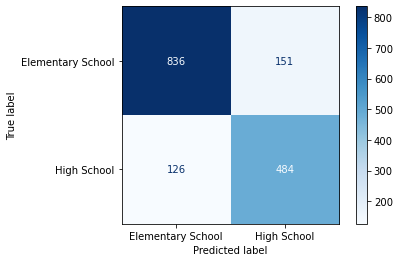

In [56]:
# Get predictions
preds=gsL2.predict(X_test_elem_hs)

# Save confusion matrix values
#.ravel flattens out the confusion matrix 
tn,fp,fn,tp = confusion_matrix(y_test_elem_hs,preds).ravel()
# View confusion matrix

plot_confusion_matrix(gsL2, X_test_elem_hs, y_test_elem_hs, cmap='Blues', display_labels = ['Elementary School', 'High School']);


<font style="font-size: 2rem; color: blue">
Use the model to predict awhich set a block of text belongs to: 
    <br> - The training set accuracy is :  <br>
    <br> - The testing set accuracy is:    <br>
   
</font>

<font style="font-size: 2rem; color: blue">
Use Logistic Regression on Elementary School and High School Data of Adjectives 
    <br> - The training set accuracy is :  <br>
    <br> - The testing set accuracy is:    <br>
   
</font>

In [112]:
# Split the data into the training and testing sets.
YY_train_elem_hs, YY_test_elem_hs, yy_train_elem_hs, yy_test_elem_hs = train_test_split(YY_elem_hs,
                                                    yy_elem_hs,
                                                    test_size=0.33,
                                                    stratify=yy_elem_hs,
                                                    random_state=42)

In [62]:
pipeL3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])




paramsL3 = {  
    'cvec__max_df': [0.8,0.85,.9, .95],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)],
    'model__C' : np.linspace(0.01, 1, 5)
}



In [63]:
gsL3 = GridSearchCV(pipeL3,paramsL3,cv = 5)

In [64]:
gsL3.fit(YY_train_elem_hs,yy_train_elem_hs)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.8, 0.85, 0.9, 0.95],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'model__C': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ])})

In [111]:
gsL3.best_params_

{'cvec__max_df': 0.8, 'cvec__ngram_range': (1, 3), 'model__C': 0.2575}

In [65]:
gsL3.score(YY_train_elem_hs, yy_train_elem_hs)

0.9407590249922864

In [66]:
gsL3.score(YY_test_elem_hs, yy_test_elem_hs)

0.7332498434564809